<a href="https://colab.research.google.com/github/sebaspv/zero_gan/blob/main/ganmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

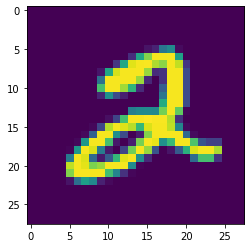

In [4]:
plt.imshow(X_train[5])

In [5]:
only_ones = X_train[y_train == 0] #Entrenaremos nuestra máquina para crear imágenes de autos

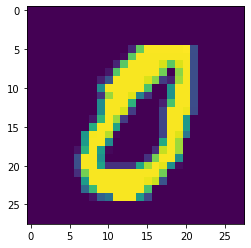

In [6]:
plt.imshow(only_ones[10])

In [7]:
only_ones[1212].shape

(28, 28)

In [8]:
only_ones = only_ones/255
only_ones = only_ones.reshape(-1,28,28,1) * 2. -1
#Pasamos los valores para que en lugar de 255 estén entre -1 y 1

In [9]:
only_ones.shape

(5923, 28, 28, 1)

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten,Dropout,LeakyReLU,BatchNormalization,Conv2D,Conv2DTranspose,MaxPool2D
from tensorflow.keras.models import Sequential

In [11]:
discriminator = Sequential()
discriminator.add(Conv2D(128,kernel_size=4,strides=2,padding='same',activation=LeakyReLU(0.3),input_shape=[28,28,1]))
discriminator.add(Dropout(0.5))
discriminator.add(Flatten())
discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [12]:
28*28

784

In [13]:
codings_size = 100 #Aquí será el valor en el que empezará nuestro generador a partir de los 3000 valores iniciales

In [14]:
generator = Sequential()
generator.add(Dense(units=7*7*128,activation='relu',input_shape=[codings_size]))
generator.add(Reshape([7,7,128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size=4, strides=2, padding='same',activation='relu'))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1, kernel_size=4, strides=2,padding='same',activation='tanh'))

In [15]:
#El generador se parece mucho al decodificador de un autoencodificador
#NO SE DEBE DE COMPILAR EL GENERADOR

In [16]:
GAN = Sequential([generator,discriminator])

In [17]:
discriminator.trainable = False #Le quitaremos el backpropagation al discriminador

In [18]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [19]:
batch_size = 32 #Elegimos un tamaño pequeño de batches

In [20]:
my_data = only_ones

In [21]:
dataset = tf.data.Dataset.from_tensor_slices(my_data)
#Creamos los batches de datos

In [22]:
dataset = dataset.batch(batch_size=batch_size,drop_remainder=True).prefetch(1)
#Se eliminan los valores que no forman parte del tamaño final de nuestro batch_size

In [23]:
epochs = 20

In [24]:
GAN.layers[0].summary() #Generador

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 128)         0         
_________________________________________________________________
batch_normalization (BatchNo (None, 7, 7, 128)         512       
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        131136    
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 1)         1025      
Total params: 766,401
Trainable params: 766,017
Non-trainable params: 384
______________________________________________

In [25]:
GAN.layers[1].summary() #Discriminante

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 128)       2176      
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 25089     
Total params: 27,265
Trainable params: 0
Non-trainable params: 27,265
_________________________________________________________________


In [26]:
generator, discriminator = GAN.layers

for epoch in range(epochs):
  i = 0
for X_batch in dataset:
  i = i+1
  if i%30 == 0:
    print(f'\t On batch number {i} of {len(my_data)//batch_size}')
  #ENTRENAMIENTO DE DISCRIMINADOR
  noise = tf.random.normal(shape=[batch_size,codings_size]) #Creamos ruido aleatorio como imagen para iniciar
  gen_images = generator(noise) #Lo entrenamos en ruido aleatorio para diferenciar entre eso y imagenes reales
  fake_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0) #Unimos las imagenes reales y falsas y las pasamos a float
  y = tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size) #Le damos el y de las imagenes falsas y las imagenes reales
  discriminator.trainable = True #Lo cambiamos de regreso a entrenarse
  discriminator.train_on_batch(fake_real,y)

  #ENTRENAMIENTO DE GENERADOR
  noise = tf.random.normal(shape=[batch_size,codings_size])
  y2 = tf.constant([[1.0]]*batch_size)
  discriminator.trainable = False #Lo volvemos a regresar para que no salte una advertencia
  GAN.train_on_batch(noise,y2)

	 On batch number 30 of 185
	 On batch number 60 of 185
	 On batch number 90 of 185
	 On batch number 120 of 185
	 On batch number 150 of 185
	 On batch number 180 of 185


In [27]:
noise = tf.random.normal(shape=[10,codings_size])

In [28]:
noise.shape

TensorShape([10, 100])

In [29]:
images = generator(noise)

In [30]:
images = np.reshape(images,[10,28,28])

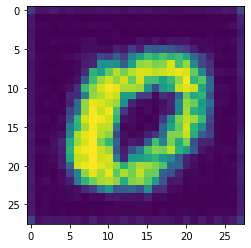

In [31]:
plt.imshow(images[1]) #Nuestros 0 creados por inteligencia artificial

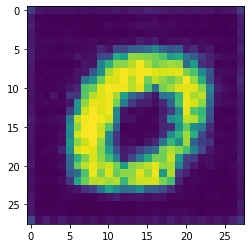

In [32]:
plt.imshow(images[0])

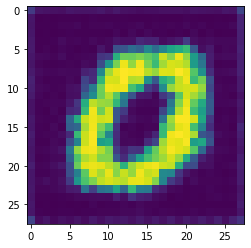

In [33]:
plt.imshow(images[8])